In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

NUM_SEEDS = 1

In [7]:
matrixName2n = {
    "ash292": 292,
    "ash85": 85,
    "bcspwr01": 39,
    "bcspwr02": 49,
    "bcspwr03": 118,
    "bcspwr04": 274,
    "bcspwr05": 443,
    "can_144": 144,
    "can_161": 161,
    "can_187": 187,
    "can_229": 229,
    "can_24": 24,
    "can_256": 256,
    "can_268": 268,
    "can_292": 292,
    "can_445": 445,
    "can_61": 61,
    "can_62": 62,
    "can_634": 634,
    "can_715": 715,
    "can_73": 73,
    "can_838": 838,
    "can_96": 96,
    "dwt_162": 162,
    "dwt_193": 193,
    "dwt_209": 209,
    "dwt_221": 221,
    "dwt_245": 245,
    "dwt_307": 307,
    "dwt_310": 310,
    "dwt_361": 361,
    "dwt_419": 419,
    "dwt_503": 503,
    "dwt_59": 59,
    "dwt_592": 592,
    "dwt_66": 66,
    "dwt_72": 72,
    "dwt_758": 758,
    "dwt_869": 869,
    "dwt_87": 87,
    "dwt_878": 878,
    "dwt_918": 918,
    "dwt_992": 992,
    "jagmesh1": 936,
    "lshp_265": 265,
    "lshp_406": 406,
    "lshp_577": 577,
    "lshp_778": 778,
    "G1": 800,
    "G14": 800,
    "G15": 800,
    "G16": 800,
    "G17": 800,
    "G2": 800,
    "G3": 800,
    "G4": 800,
    "G43": 1000,
    "G44": 1000,
    "G45": 1000,
    "G46": 1000,
    "G47": 1000,
    "G5": 800,
    "G51": 1000,
    "G52": 1000,
    "G53": 1000,
    "G54": 1000,
    "mesh3e1": 289,
    "mesh3em5": 289,
    "sphere2": 66,
    "sphere3": 258,
    "lap_25": 25,
    "GD06_theory": 101,
    "GD96_c": 65,
    "GD97_a": 84,
    "GD98_c": 112,
    "GD99_b": 64,
    "Journals": 124,
    "Sandi_authors": 86,
    "USAir97": 332,
    "EX1": 560,
    "EX2": 560,
    "Trefethen_20b": 19,
    "Trefethen_20": 20,
    "Trefethen_150": 150,
    "Trefethen_200b": 199,
    "Trefethen_200": 200,
    "Trefethen_300": 300,
    "Trefethen_500": 500,
    "Trefethen_700": 700,
    "adjnoun": 112,
    "dolphins": 62,
    "football": 115,
    "karate": 34,
    "lesmis": 77,
    "polbooks": 105,
    "jazz": 198,
    "celegans_metabolic": 453,
    "grid1": 252,
    "grid1_dual": 224,
    "netz4504_dual": 615,
    "L": 956,
    "cage": 366,
    "chesapeake": 39,
    "mycielskian2": 2,
    "mycielskian3": 5,
    "mycielskian4": 11,
    "mycielskian5": 23,
    "mycielskian6": 47,
    "mycielskian7": 95,
    "mycielskian8": 191,
    "mycielskian9": 383,
    "mycielskian10": 767,
    "breasttissue_10NN": 106,
    "collins_15NN": 1000,
    "dermatology_5NN": 366,
    "Ecoli_10NN": 336,
    "Glass_10NN": 214,
    "iris_dataset_30NN": 150,
    "micromass_10NN": 571,
    "Olivetti_norm_10NN": 400,
    "Spectro_10NN": 531,
    "umistfacesnorm_10NN": 575,
    "Vehicle_10NN": 846,
    "YaleA_10NN": 165,
}

In [8]:
def parse_hist_file(file_path):

    data = {}
    with open(file_path, "r") as file:
        num_matrices, num_methods = map(int, file.readline().strip().split())

        for _ in range(num_matrices):
            matrix_name = file.readline().strip()
            data[matrix_name] = {}

            for _ in range(num_methods):
                method_name = file.readline().strip()
                data[matrix_name][method_name] = {}
                for idx in range(NUM_SEEDS):
                    data[matrix_name][method_name][idx] = {}
                    score_line = file.readline().strip()
                    score = float(score_line.split(": ")[1])
                    data[matrix_name][method_name][idx]["score"] = score

    return data

In [12]:
tab = sns.color_palette("tab10")

for file_path in ["hist_50.txt"]:
    parsed_data = parse_hist_file(file_path)

    df = pd.DataFrame(columns=["Method", "matrixName", "score"])
    for matrix_name, matrix_data in parsed_data.items():
        for method_name, method_data in matrix_data.items():
            for seed_idx, seed_data in method_data.items():
                df = pd.concat(
                    [
                        df,
                        pd.DataFrame(
                            {
                                "Method": [method_name],
                                "matrixName": [matrix_name],
                                "score": [seed_data["score"]],
                            }
                        ),
                    ]
                )

    df_mean = df.groupby(["Method", "matrixName"]).mean().reset_index()

    # sort rows by the n of the matrix
    df_mean["n"] = df_mean["matrixName"].map(matrixName2n)
    df_mean = df_mean.sort_values("n")

    for methodSuffix in ["FR", "L-BFGS"]:
        df_nonCN = df_mean[df_mean["Method"] == methodSuffix]
        df_CN = df_mean[df_mean["Method"] == "CN-" + methodSuffix]
        df_merged = pd.merge(
            df_nonCN, df_CN, on="matrixName", suffixes=(f"_nonCN", f"_CN")
        )
        df_merged["diff"] = df_merged["score_CN"] - df_merged["score_nonCN"]

        plt.figure(figsize=(20, 3))
        sns.barplot(
            x="matrixName",
            y="diff",
            data=df_merged,
            color=tab[0 if methodSuffix == "FR" else 1],
        )

        plt.xticks([])
        plt.yticks(fontfamily="serif")
        plt.xlabel("")
        plt.ylabel(
            f"diff at {file_path[5:7]} iter.",
            fontsize=20,
            fontfamily="serif",
        )

        minScore = min(0, df_merged["diff"].min())
        maxScore = max(0, df_merged["diff"].max())
        plt.ylim(minScore * 1.1, maxScore * 1.1)

        if methodSuffix == "L-BFGS":
            plt.text(
                55,
                0.2,
                "dwt_245$\\rightarrow$",
                ha="right",
                fontsize=25,
                fontfamily="monospace",
            )

        plt.title(f"CN-{methodSuffix} - {methodSuffix}", fontsize=25)
        plt.savefig(
            f"plot/diff_{methodSuffix}_{file_path[5:7]}.pdf", bbox_inches="tight"
        )
        plt.close()
        # plt.show()

        # df_merged["diff"] の中から、1以上の値を持つ行だけを抽出
        df_merged_positive = df_merged[df_merged["diff"] > 1]
        display(df_merged_positive)

/tmp/ipykernel_28215/999190032.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


,Method_nonCN,matrixName,score_nonCN,n_nonCN,Method_CN,score_CN,n_CN,diff
38,FR,can_144,8.343601,144,CN-FR,22.386245,144,14.042644
43,FR,YaleA_10NN,17.805402,165,CN-FR,21.217807,165,3.412405
51,FR,Glass_10NN,1.672383,214,CN-FR,14.375042,214,12.702659


,Method_nonCN,matrixName,score_nonCN,n_nonCN,Method_CN,score_CN,n_CN,diff
12,L-BFGS,bcspwr02,0.913735,49,CN-L-BFGS,2.343866,49,1.430131
15,L-BFGS,can_62,-6.534634,62,CN-L-BFGS,-4.449161,62,2.085473
32,L-BFGS,breasttissue_10NN,24.584652,106,CN-L-BFGS,25.862289,106,1.277637
38,L-BFGS,can_144,3.179849,144,CN-L-BFGS,18.327471,144,15.147622
43,L-BFGS,YaleA_10NN,15.617099,165,CN-L-BFGS,19.543282,165,3.926183
55,L-BFGS,dwt_245,9.097246,245,CN-L-BFGS,10.866498,245,1.769252
56,L-BFGS,grid1,-10.963189,252,CN-L-BFGS,-5.172185,252,5.791004
61,L-BFGS,bcspwr04,-6.789656,274,CN-L-BFGS,-1.783586,274,5.006070
63,L-BFGS,mesh3e1,-52.629860,289,CN-L-BFGS,-22.160028,289,30.469832
67,L-BFGS,dwt_307,57.827572,307,CN-L-BFGS,60.578339,307,2.750767


out/dwt_245_CN-L-BFGS_50.out
245 608 48375.41118421053


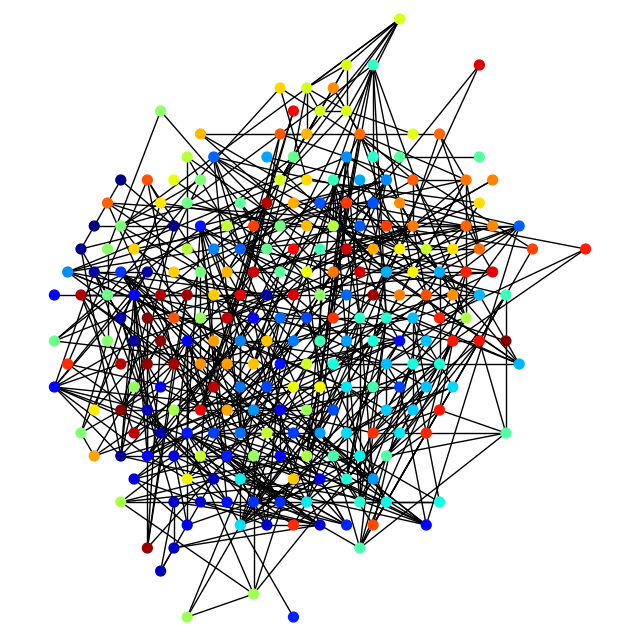

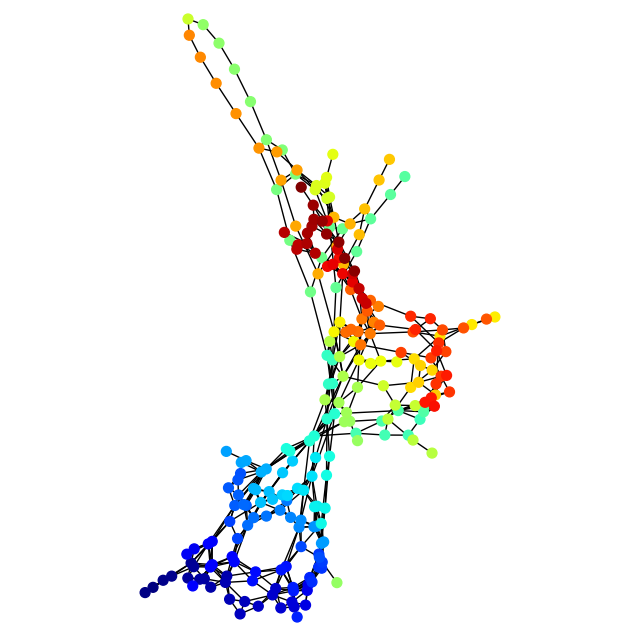

In [10]:
import networkx as nx
from src.python.vis.visGraph import visGraph


def read_file(file_path):
    with open(file_path, "r") as file:
        n, m, _k = map(float, file.readline().strip().split())
        assert n == int(n) and m == int(m)
        n = int(n)
        m = int(m)
        row = []
        col = []
        data = []
        for _ in range(m):
            r, c, d = map(float, file.readline().strip().split())
            assert r == int(r) and c == int(c)
            r = int(r)
            c = int(c)
            row.append(r)
            col.append(c)
            data.append(d)
        positions_size = int(file.readline().strip())
        positions = []
        for _ in range(positions_size):
            position = []
            for _ in range(n):
                x, y = map(float, file.readline().strip().split())
                position.extend([x, y])
            positions.append(position)

    print(n, m, f"{2*n*n*n/m}")

    Gs = []
    for pos in positions:
        G = nx.Graph()
        for i in range(n):
            G.add_node(i, pos=(pos[2 * i], pos[2 * i + 1]))
        for i in range(m):
            G.add_edge(row[i], col[i], weight=data[i])
        Gs.append(G)

    return Gs


for file_path, method, idx in [
    ("dwt_245", "L-BFGS_50", 5),
]:
    file_path = f"out/{file_path}_CN-{method}.out"
    print(file_path)
    Gs = read_file(file_path)
    for i in [idx, -1]:
        which = "last" if i == -1 else "first"
        G = Gs[i]
        visGraph(
            G,
            nx.get_node_attributes(G, "pos"),
            # savePath="vis/" + file_path.split("/")[-1].replace(".out", f"_{which}.png"),
        )